In [1]:
import h5py
import numpy as np 
import time
import matplotlib.pyplot as plt

In [2]:
def get_2D_data_from_h5_filtered_np(h5_path, part_name, Slice_name):
    #opening h5 and getting the data
    start_time = time.time()

    with h5py.File(h5_path,'r') as h5:
        #check whether slice exists -> if not: empty array returned
        if Slice_name in h5[part_name]:
            Y_Axis = np.array(h5[part_name][Slice_name]['Y-Axis'][:]).astype(int)
            Area = np.array(h5[part_name][Slice_name]['Area'][:]).astype(int)
            Intensity = np.array(h5[part_name][Slice_name]['Intensity'][:]).astype(int)
            X_Axis = np.array(h5[part_name][Slice_name]['X-Axis'][:]).astype(int)

            X_Axis_size = X_Axis.size
            Y_Axis_size = Y_Axis.size
            Area_size = Area.size
            Intensity_size = Intensity.size

            #if dimensions aren't equal the following code block is entered
            if not X_Axis_size == Y_Axis_size == Area_size == Intensity_size:

                #determine the lowest value among the different sizes
                size_arr = np.array([X_Axis_size, Y_Axis_size, Area_size, Intensity_size])
                min_size = size_arr.min()

                if X_Axis_size != min_size:
                    diff_size_x = X_Axis_size - min_size #calculating the difference between the actual value and the minimum and substracting it from the array
                    X_Axis_new = np.delete(X_Axis, -diff_size_x)
                    X_Axis = X_Axis_new
                    X_Axis_size = X_Axis.size

                if Y_Axis_size != min_size:
                    diff_size_y = Y_Axis_size - min_size
                    Y_Axis_new = np.delete(Y_Axis, -diff_size_y)
                    Y_Axis = Y_Axis_new
                    Y_Axis_size = Y_Axis.size

                if Area_size != min_size:
                    diff_size_area = Area_size - min_size
                    Area_new = np.delete(Area, -diff_size_area)
                    Area = Area_new
                    Area_size = Area.size

                if Intensity_size != min_size:
                    diff_size_intensity = Intensity_size - min_size
                    Intensity_new = np.delete(Intensity, -diff_size_intensity)
                    Intensity = Intensity_new
                    Intensity_size = Intensity.size

                #by reducing all the dimensions to the minimum equal dimensions are guaranteed
                #there is a risk of deleting more than just one datapoint without noticing -> maybe add an alert after more than 5(?) while iterations
            print(str(X_Axis_size)+ ' datapoints found')
            combos = np.stack((X_Axis, Y_Axis, Area, Intensity), axis=-1)

            #filtering out the datapoints where area and intensity are =0
            area_zeros = np.where(combos[:,2]== 0)
            intensity_zeros = np.where(combos[:,3]==0)
            zero_area_intensity_indices = np.intersect1d(area_zeros, intensity_zeros) #array of indices where area AND intensity are = 0

            #deleting all the datapoints where area AND intensity are = 0
            combos_wo_only_zeros = np.delete(combos, zero_area_intensity_indices, axis=0)
            print(str(combos_wo_only_zeros.shape[0]) + ' datapoints where area != 0 AND intensity != 0')

            combos_wo_only_zeros_unique, unique_indices = np.unique(combos_wo_only_zeros[:,[0,1]],axis=0, return_index = True)
            combos_unique = combos_wo_only_zeros[unique_indices]
            print(str(combos_unique.shape[0]) + ' unique datapoints where area != 0 AND intensity != 0')

            Index_range = np.arange(combos_wo_only_zeros.shape[0])
            indices_of_interest = np.setdiff1d(Index_range, unique_indices) #all the indices belonging to non unique x,y-combinations
            
            return(combos_wo_only_zeros[indices_of_interest])
            

In [23]:
array_multi_undocked = get_2D_data_from_h5_filtered_np('/home/jan/Documents/Klein_Datentransfer/HDF/BJ_Superlativ_QualiPro.h5', '0_00097_ZP1_Z_cls', 'Slice00003')

14440 datapoints found
10146 datapoints where area != 0 AND intensity != 0
9443 unique datapoints where area != 0 AND intensity != 0


In [24]:
array_multi_undocked

array([[-17215,   7674,      0,    727],
       [-17215,   7674,    198,    789],
       [-17215,   7674,    397,    458],
       ...,
       [-15959,   8886,    506,      0],
       [-15959,   8886,    147,      0],
       [-15959,   8886,     73,      0]])

In [7]:
h5_path = '/home/jan/Documents/Klein_Datentransfer/HDF/BJ_Superlativ_QualiPro.h5'
Slice_name = 'Slice00001'
part_name = '0_00097_ZP1_Z_cls'
max_slice_number = 1


In [8]:
def get_true_min_maxY (h5_path, part_name, max_slice_number):

    minY = []
    maxY = []
    for num_slice in range(max_slice_number):
        with h5py.File(h5_path,'r') as h5:
            Y_Axis = h5[part_name]['Slice'+str("{:05d}".format(num_slice+1))]['Y-Axis']
            y_axis_array = np.array(Y_Axis)
            minY.append(y_axis_array.min())
            maxY.append(y_axis_array.max())
    minY_array = np.asarray(minY)
    maxY_array = np.asarray(maxY)
    return minY_array.min(), maxY_array.max()


In [9]:
def get_true_min_maxX (h5_path, part_name, max_slice_number):

    minX = []
    maxX = []
    for num_slice in range(max_slice_number):
        with h5py.File(h5_path,'r') as h5:
            X_Axis = h5[part_name]['Slice'+str("{:05d}".format(num_slice+1))]['X-Axis']
            x_axis_array = np.array(X_Axis)
            minX.append(x_axis_array.min())
            maxX.append(x_axis_array.max())
    minX_array = np.asarray(minX)
    maxX_array = np.asarray(maxX)
    return minX_array.min(), maxX_array.max()

In [10]:
minX, maxX = get_true_min_maxX (h5_path, part_name, max_slice_number)
minY, maxY = get_true_min_maxY (h5_path, part_name, max_slice_number)

In [11]:
minX

-17437.0

In [12]:
maxX

5964.0

In [13]:
minY

7387.0

In [14]:
maxY

9135.0

In [18]:
def dock_array_to_zero(array, minX, minY):
    if minX >= 0 and minY >=0:
        array[:,0] = array[:,0] - minX
        array[:,1] = array[:,1] - minY
    elif minX < 0 and minY <0:
        array[:,0] = array[:,0] + abs(minX)
        array[:,1] = array[:,1] + abs(minY)
    elif minX >= 0 and minY <0:
        array[:,0] = array[:,0] - minX
        array[:,1] = array[:,1] + abs(minY)
    elif minX < 0 and minY >= 0:
        array[:,0] = array[:,0] + abs(minX)
        array[:,1] = array[:,1] - minY
    return array

In [25]:
array_multi_docked = dock_array_to_zero(array_multi_undocked, minX, minY)

In [26]:
array_multi_docked

array([[ 222,  287,    0,  727],
       [ 222,  287,  198,  789],
       [ 222,  287,  397,  458],
       ...,
       [1478, 1499,  506,    0],
       [1478, 1499,  147,    0],
       [1478, 1499,   73,    0]])

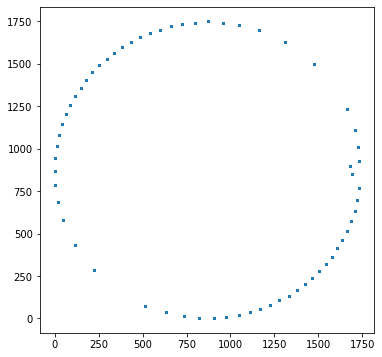

In [27]:
fig = plt.figure( figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
x = array_multi_docked[:,0]
y = array_multi_docked[:,1]
area = np.pi*1
ax.scatter(x, y, s=area)
plt.show()